The goal of the problem is to predict the miles per gallon a car will get using six quantities (features) about that car. The data is broken into training and testing sets. Each row in both “X” files contain six features for a single car (plus a 1 in the 7th dimension) and the same row in the corresponding “y” file contains the miles per gallon for that car.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Load data

In [8]:
X_train1 = np.loadtxt('./hw1-data/X_train.csv', delimiter=',')
X_test1 = np.loadtxt('./hw1-data/X_test.csv', delimiter=',')
y_train = np.loadtxt('./hw1-data/y_train.csv', delimiter=',')
y_test = np.loadtxt('./hw1-data/y_test.csv', delimiter=',')

Include the $2^{nd}$ and $3^{rd}$ order terms of each dimension (w/o cross terms)

In [9]:
X_train2 = np.concatenate((X_train1[:,:-1]**2,X_train1), axis=1)
X_train3 = np.concatenate((X_train1[:,:-1]**3, X_train2), axis=1)

X_test2 = np.concatenate((X_test1[:,:-1]**2,X_test1), axis=1)
X_test3 = np.concatenate((X_test1[:,:-1]**3, X_test2), axis=1)

The loss function for the **ridge regression** problem that we are trying to minimize is as follows:
$$
L = \lambda\Vert w^2\Vert + \Sigma\Vert y_{i} - x_{i}^Tw\Vert ^2
$$
Setting $\nabla L = 0$, we get:
$$
w = (\lambda I + X^TX)^{-1}X^Ty
$$
The following function calculates the above regression coefficients, along with the degrees of freedoms given by the formula:
$$
tr[X(X^TX + \lambda I)^{-1.}X^T]
$$

In [47]:
def ridge_regression(X_train, y_train, lmbda):
    d = X_train.shape[1]
    U, s, V = np.linalg.svd(X_train)
    S_diag = np.diag(s)

    w = np.dot(np.linalg.inv(lmbda*np.eye(d) + np.dot(X_train.T, X_train)), np.dot(X_train.T, y_train))
    
    # Degrees of freedom are calculated using alternate formulation
    M = np.linalg.inv(lmbda * np.linalg.matrix_power(S_diag, -2) + np.eye(d))
    df = np.trace(M)
        
    return w, df

Solve the ridge regression problems for different values of $\lambda$ i.e. the regularization coefficient

In [21]:
coeffs = []
dfs = []
for lmbda in range(5001):
    w, df = ridge_regression(X_train1, y_train, lmbda)
    coeffs.append(w)
    dfs.append(df)

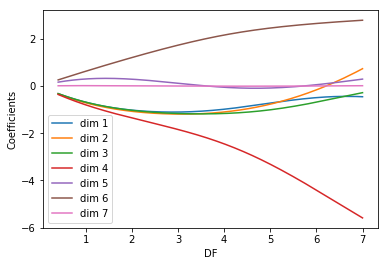

In [49]:
plt.plot(dfs, coeffs)
plt.legend(['dim {}'.format(i) for i in range(1, 8)], loc = 'lower left')
plt.ylabel('Coefficients')
plt.xlabel('DF')
plt.show()

- The 4th dimension (car weight) and 6th dimension (car year) have the highest magnitude, which indicates that these are the two most important features to determine fuel efficiency.
- Since the coefficient of the 6th dimension is positive, it indicates that fuel efficiency increases with increase in year i.e. the newer cars are more fuel efficient.
- The 4th dimension has negative coefficient indicating that fuel efficiency decreases with increasing car weight.
- Since the coefficients of the 4th and 6th dimension are the highest, they are the ones that are most penalized as the value of λ is increased, as is expected from L2 penalty

Calculate the RMSE on the test set

In [54]:
predictions = [np.dot(X_test1, w) for w in coeffs[0:51]]
RMSE = [(np.linalg.norm(y_test - y_predicted) / len(y_test) ** .5) for y_predicted in predictions]

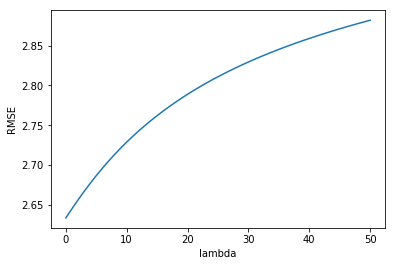

In [55]:
plt.plot(range(0,51), RMSE)
plt.ylabel('RMSE')
plt.xlabel('lambda')
plt.show()

This plot shows that minimum RMSE is achieved at lower values of λ. The lowest value of RMSE is achieved at λ=0, thus indicating Least Squares solution is better than the Ridge Regression solution.

Compare test set RMSE values for different combinations of $\lambda$ (regularization coefficient) and p ($p^{th}$ order polynomial regression)

In [56]:
RMSE1 = []
RMSE2 = []
RMSE3 = []
for lmbda in range(501):
    w1, _ = ridge_regression(X_train1, y_train, lmbda)
    y_predicted1 = np.dot(X_test1, w1)
    rmse1 = np.linalg.norm(y_test - y_predicted1) / len(y_test) ** .5
    RMSE1.append(rmse1)

    w2, _ = ridge_regression(X_train2, y_train, lmbda)
    y_predicted2 = np.dot(X_test2, w2)
    rmse2 = np.linalg.norm(y_test - y_predicted2) / len(y_test) ** .5
    RMSE2.append(rmse2)

    w3, _ = ridge_regression(X_train3, y_train, lmbda)
    y_predicted3 = np.dot(X_test3, w3)
    rmse3 = np.linalg.norm(y_test - y_predicted3) / len(y_test) ** .5
    RMSE3.append(rmse3)

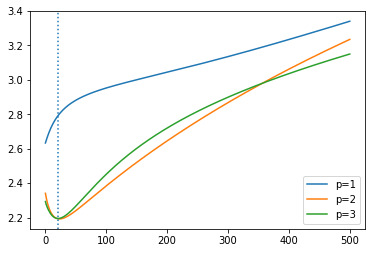

In [40]:
plt.plot(range(0,501), RMSE)
plt.plot(range(0,501), RMSE2)
plt.plot(range(0,501), RMSE3)
plt.axvline(21, linestyle='dotted')
plt.legend(['p=1','p=2','p=3'])
plt.show()

According to this plot, the lowest RMSE is achieved at both p = 2 and p = 3. Hence, we should go with the simpler model of p = 2.
When higher order terms are considered, p = 2 and λ = 23 gives the lowest RMSE. This is because p = 1 gives a simple model that underfits the data. When p = 2 and p = 3, the model fits the data better than at p = 1. However, for a given value of p, the model overfits data for low values of λ. As λ is increased, RMSE decreases. At λ = 23 and p = 2, the model gives the lowest RMSE. As λ is increased further, the model becomes more simple and starts to underfit the training data.